Задание продвинутого уровня.

# Загрузка предобработанного датасета.


In [61]:
import pandas as pd

In [66]:
data_path = '/content/drive/MyDrive/ML/TUSUR_ML/#4_trees&KNN/DecisionTree/data/'

# загрузка предобработанного датасета и выбор необходимых колонок

df = pd.read_csv(data_path + 'prepared_ds.csv', index_col=0)
df = df[['store_id', 'order_price', 'profit', 'delivery_distance',
         'planned_prep_time', 'region_id', 'items_count', 'day_of_week',
         'hour_start_sin', 'hour_start_cos', 'minutes_start_sin', 'minutes_start_cos', 'prepared_on_time']]
df

,store_id,order_price,profit,delivery_distance,planned_prep_time,region_id,items_count,day_of_week,hour_start_sin,hour_start_cos,minutes_start_sin,minutes_start_cos,prepared_on_time
0,5014,30.49,45.5040,2205,15.0,683,2,3,-0.707107,-0.707107,0.258819,0.965926,True
1,3856,60.21,30.3360,1368,10.0,683,2,3,-0.707107,-0.707107,0.258819,0.965926,True
2,10825,8.27,43.6080,459,20.0,683,1,3,-0.707107,-0.707107,-0.258819,0.965926,True
3,5640,24.68,32.8640,2611,20.0,709,2,3,-0.707107,-0.707107,-0.965926,0.258819,True
4,7283,14.02,11.0600,1041,15.0,707,1,3,-0.707107,-0.707107,-0.965926,0.258819,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,7557,96.71,50.1650,8046,35.0,683,5,1,-0.707107,-0.707107,0.707107,0.707107,True
7783,4548,21.05,14.6150,2225,20.0,707,2,1,-0.707107,-0.707107,0.500000,0.866025,True
7784,7099,102.11,12.1976,3354,25.0,683,5,1,-0.707107,-0.707107,0.500000,0.866025,True
7785,4348,43.43,49.2960,2129,30.0,683,3,1,-0.707107,-0.707107,0.707107,0.707107,True


#Разделение данных на целевую переменную и признаки.

In [67]:
X = df.drop("prepared_on_time", axis = 1)
y = df.prepared_on_time

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 52, stratify = y)

#Подбор гиперпараметров с помощью GridSearch.

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dec_tree = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'class_weight' : ['balanced', {0: 50, 1: 1}, {0: 10, 1: 1}]
}

grid_search = GridSearchCV(
    dec_tree,
    param_grid,
    cv=5,
    scoring='balanced_accuracy'
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("Best accuracy:", grid_search.best_score_)

Best accuracy: 0.5658574531597301


#Визуализация дерева.

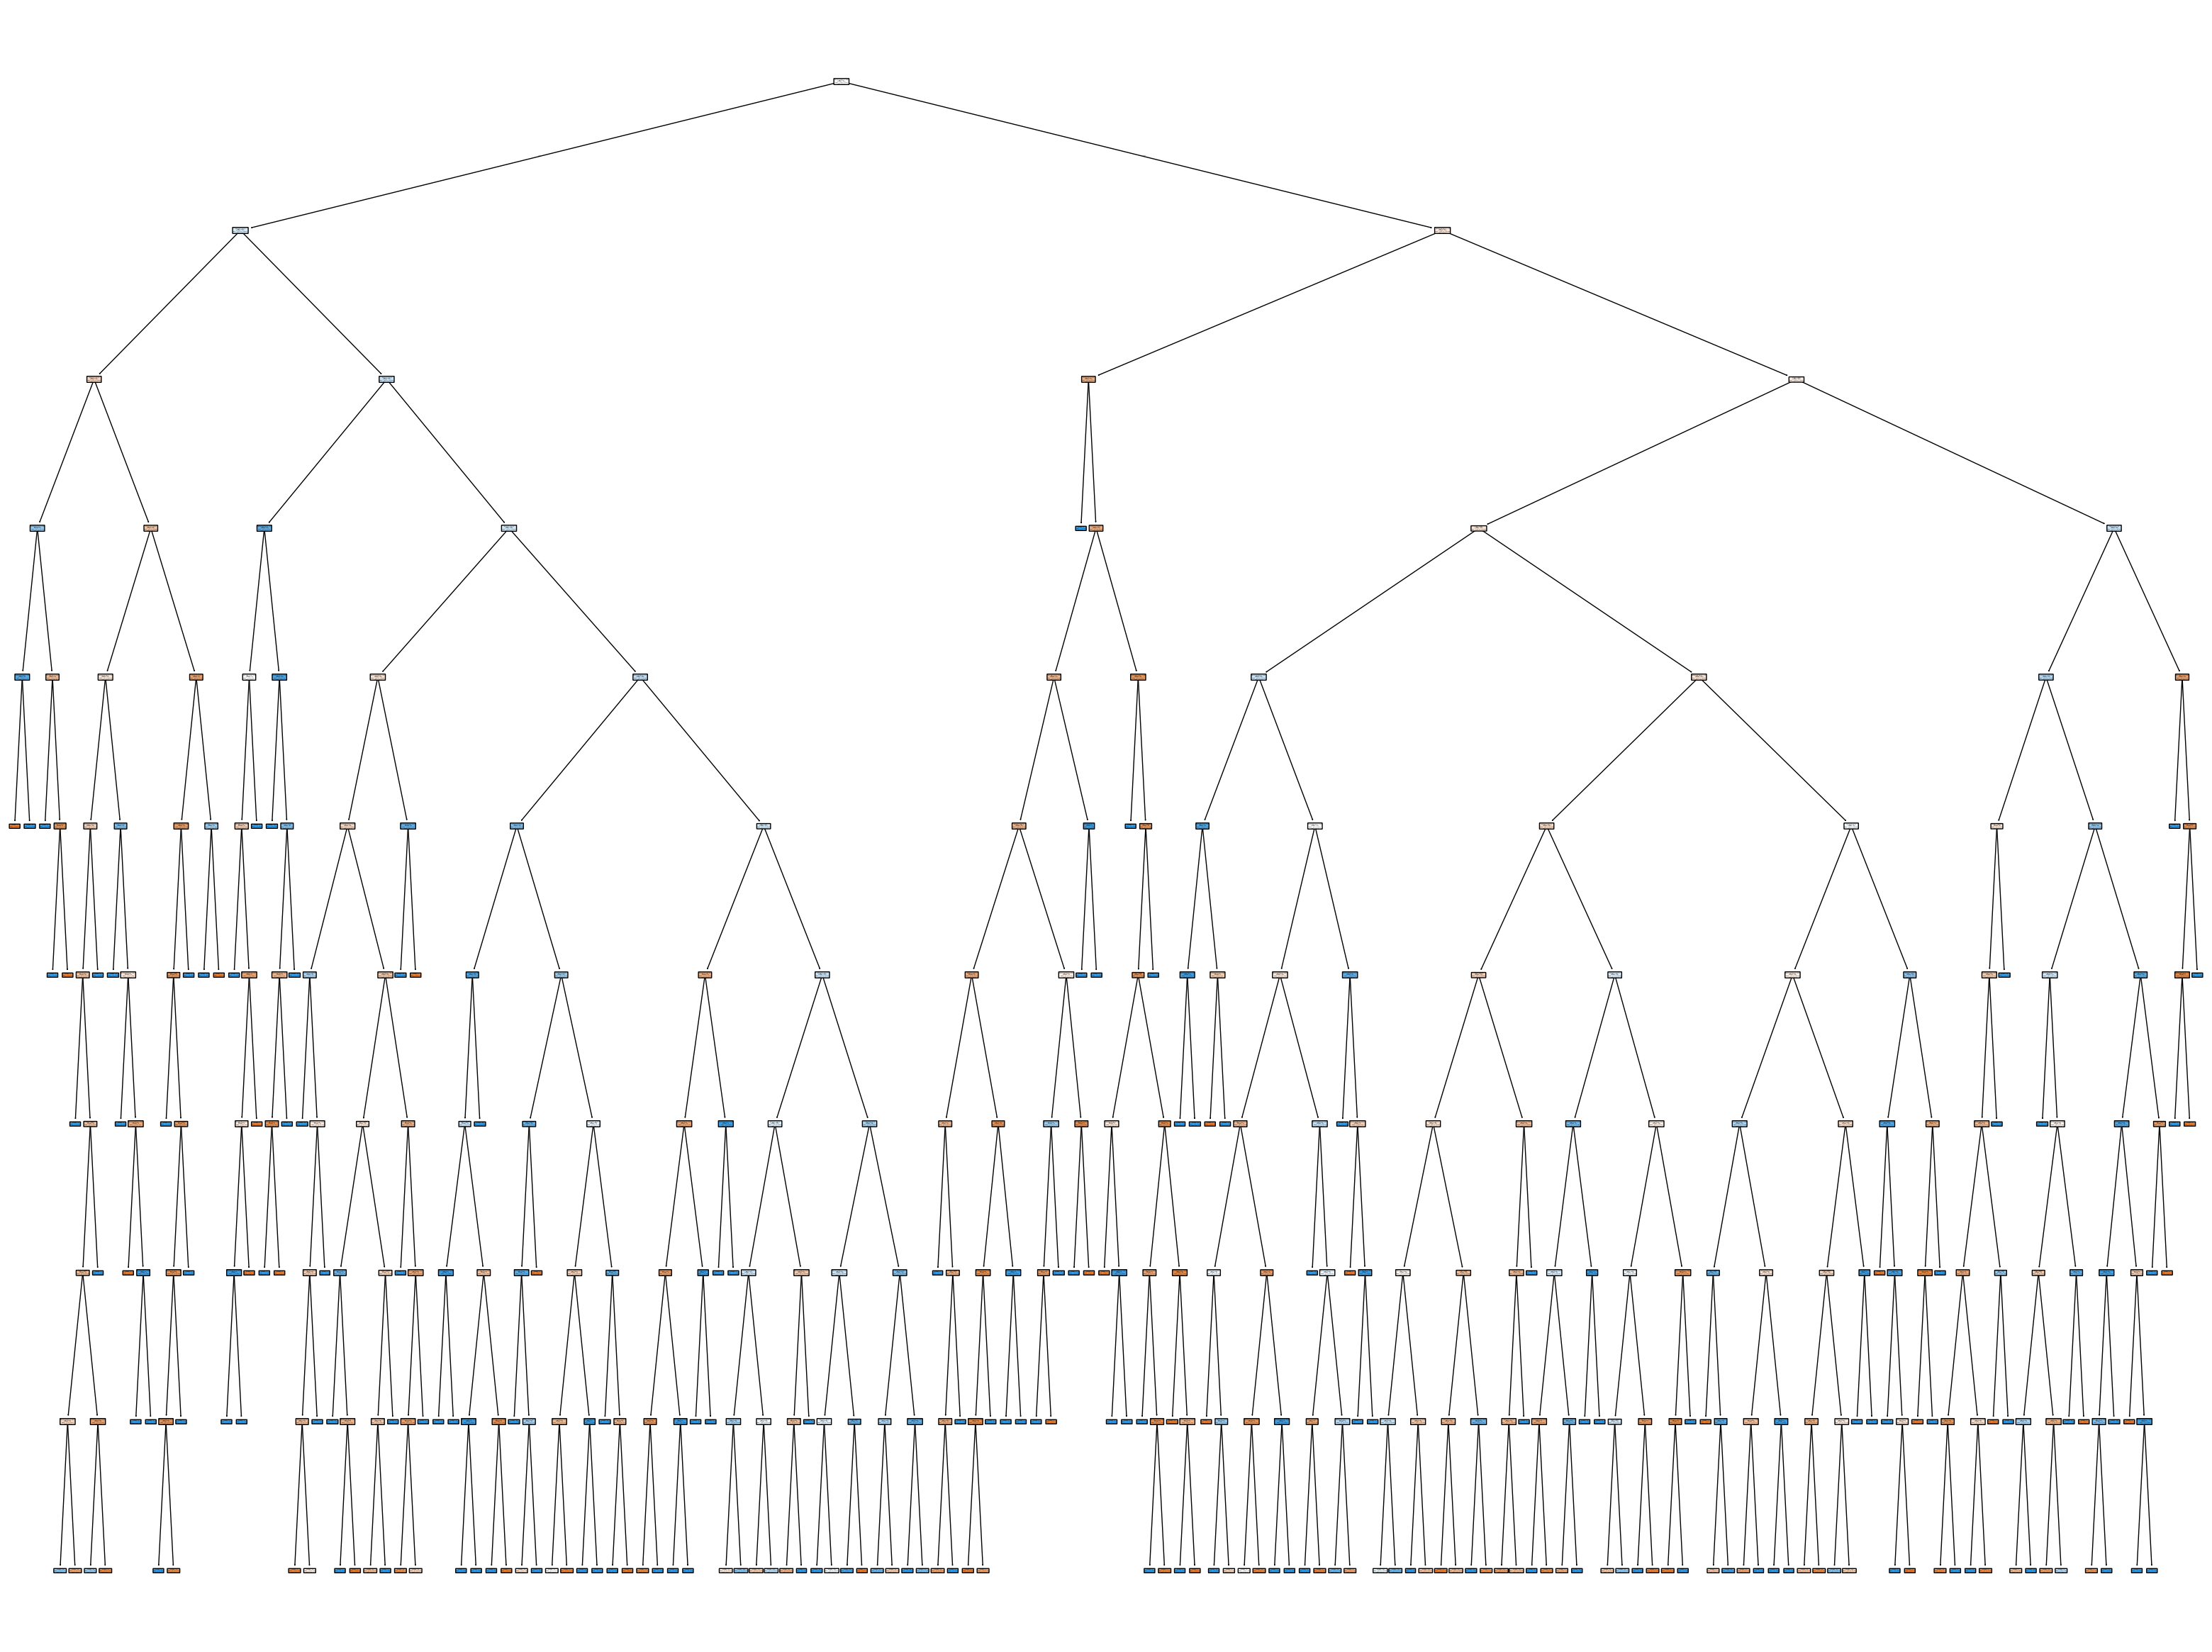

In [79]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 30))
plot_tree(best_model, filled=True, feature_names=X_train.columns, class_names=['class_0', 'class_1'], rounded=True)
plt.show()

In [80]:
pip install graphviz

In [87]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    best_model,
    out_file=None,
    feature_names=X.columns,
    class_names=['class_0', 'class_1'],
    filled=True,
    rounded=True,
)

graph = graphviz.Source(dot_data)
graph.view()

'Source.gv.pdf'

https://drive.google.com/file/d/1-SypB8-FL0TgnqEbnOOZ3yb_SOltvfAv/view?usp=drive_link  - читаемая визуализация дерева.

#Обучение модели на всей обучающей выборке, используя подобранные гиперпараметры и оценка важности признаков.

In [70]:
f_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
})

f_importances

,feature,importance
0,store_id,0.185658
1,order_price,0.123422
2,profit,0.121498
3,delivery_distance,0.216241
4,planned_prep_time,0.061338
5,region_id,0.044446
6,items_count,0.017579
7,day_of_week,0.016124
8,hour_start_sin,0.053176
9,hour_start_cos,0.058519


In [71]:
print("Best params:", grid_search.best_params_)

Best params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}


In [72]:
dec_tree =  DecisionTreeClassifier(class_weight = 'balanced', criterion = 'gini', max_depth = 10, min_samples_leaf = 1)
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)

In [73]:
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Balanced accuracy: ', balanced_accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.18      0.42      0.25       384
        True       0.85      0.63      0.72      1953

    accuracy                           0.59      2337
   macro avg       0.51      0.52      0.49      2337
weighted avg       0.74      0.59      0.64      2337

Accuracy:  0.5930680359435173
Balanced accuracy:  0.5222094214029698
Precision:  0.8455172413793104
Recall:  0.6277521761392729
F1:  0.7205406993828974


#Выводы
Значения метрик посредсвтвенные ввиду сильного дизбаланса классов. Представителей класса 0 недостаточно для того чтобы качественно определить зависимости.